# MLP with backpropagation learning on XOR problem

- See: https://web.cs.dal.ca/~tt/fundamentals/programs/Octave/Chapter6/

In [11]:
import ipywidgets as widgets
from ipywidgets import interact

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def mlp(N_h):
    # Parameters, neurons: input, hidden, output
    N_i = 2; N_o = 1

    # XOR input
    r_i = np.matrix('0 1 0 1; 0 0 1 1')

    # XOR output
    r_d = np.matrix('0 1 1 0')

    # Initialize randomly the weights
    # Hidden layer
    w_h = np.random.rand(N_h,N_i) - 0.5
    # Output layer
    w_o=np.random.rand(N_o,N_h) - 0.5

    training_steps = 10000
    mse = []

    for i in range(training_steps):
        # Select training pattern randomly
        i = np.floor(4*np.random.rand()).astype('int')

        # Feed-forward the input to hidden layer
        r_h = 1 / (1 + np.exp(-w_h*r_i[:,i]))

        # Feed-forward the input to the output layer
        r_o = 1 / (1 + np.exp(-w_o*r_h))

        # Calculate the network error
        d_o = (r_o*(1-r_o)) * (r_d[:,i] - r_o)

        # Calculate the responsability of the hidden network in the error
        d_h = np.multiply(np.multiply(r_h, (1-r_h)), (w_o.T*d_o))

        # Update weights
        w_o = w_o + 0.7*(r_h*d_o.T).T

        w_h = w_h + 0.7*(r_i[:,i]*d_h.T).T

        # Test all patterns
        r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))

        mse += [mean_squared_error(r_d, r_o_test)]
        
    print("Output:", r_o_test)

    plt.plot(mse)
    plt.show()

nh = [i for i in range(2,11)] + [100,200,500,1000]

interact(mlp, N_h=nh)

A Jupyter Widget

<function __main__.mlp>

In [2]:
# Let's see what we have in the network response 
# for the input data
r_o_test

matrix([[ 0.07504941,  0.92845073,  0.9267407 ,  0.07866803]])

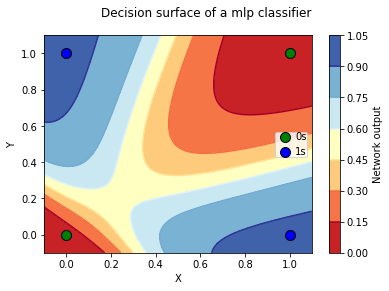

In [3]:
# Parameters
n_classes = 2
plot_colors = "gb"
plot_markers = "oo"

x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*np.c_[xx.ravel(), yy.ravel()].T)))))

Z = Z.reshape(xx.shape)

# Plot contour
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
csl = plt.contour(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Make a colorbar for the cs returned by the contourf call.
cbar = plt.colorbar(cs)
cbar.ax.set_ylabel('Network output')
# Add the contour line levels to the colorbar
cbar.add_lines(csl)

plt.xlabel("X")
plt.ylabel("Y")

t_names = ["0s", "1s"]

rd = np.squeeze(np.asarray(r_d))

# Plot the training points
for i, color, m in zip(range(n_classes), plot_colors, plot_markers):
    idx = np.where(rd == i)
    plt.scatter(np.squeeze(np.asarray(r_i.T[list(idx[0]),0])), 
                np.squeeze(np.asarray(r_i.T[list(idx[0]),1])), 
                c=color, label=t_names[i], cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=100, marker=m)

plt.suptitle("Decision surface of a mlp classifier")
plt.legend(loc='center right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

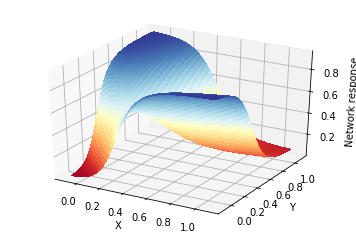

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu,
                       linewidth=0, antialiased=False)

ax.view_init(30, -60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Network response')

plt.show()